# Significant Testing

Hypothesis testing allows us to calculate the probability that random chance was actually responsible for the difference in outcome. If a new weight loss pill helped people lose more weight:

- `Null hypothesis`: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill. 
- `Alternative hypothesis`: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
weight_lost_a = [1.1,1.1,1.2,1.4,1.6,1.8,1.2,1.9,1.3,2.4,2.6,2.7,2.2,2.9,2.1,2.1,2.2,2.4,2.6,2.8,2.2,2.9,2.3,3.2,3.4,3.3,3.5,3.6,3.7,3.2,3.9,3.6,3.1,3.2,3.4,3.6,3.8,3.2,5.9,3.3,4.5,4.5,5.8,4.1,4.4,5.1,5.7,6.7,7.2,10.4]
weight_lost_b = [2.1,2.5,3.2,3.4,3.6,3.8,3.2,3.9,3.3,4.4,4.6,4.7,4.2,4.9,4.1,4.1,4.2,4.4,5.6,5.8,5.2,5.9,5.3,5.2,5.4,5.3,5.5,5.6,5.7,5.2,7.9,7.6,7.1,7.2,7.4,7.6,7.8,8.2,8.9,8.3,8.5,8.5,8.8,8.1,8.4,9.1,10.2,10.9,10.3,10.5,10.5,11.8]

In [7]:
mean_group_a = np.mean(weight_lost_a)
print(mean_group_a)
mean_group_b = np.mean(weight_lost_b)
print(mean_group_b)

3.3259999999999996
6.30576923076923


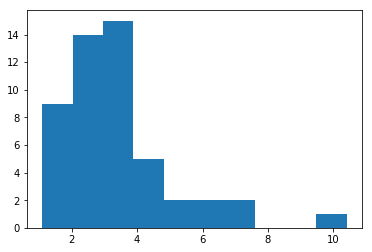

In [9]:
plt.hist(weight_lost_a)
plt.show()

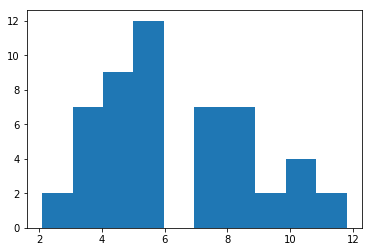

In [10]:
plt.hist(weight_lost_b)
plt.show()

### Test statistic

In [14]:
mean_difference  = mean_group_b - mean_group_a
mean_difference

2.9797692307692305

### Permutation test

In [21]:
all_values = weight_lost_a + weight_lost_b

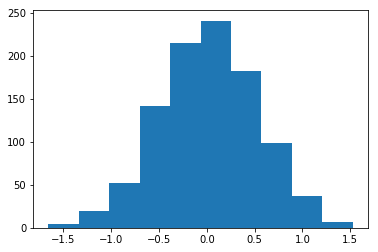

In [26]:
mean_differences=[]

for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        r = np.random.rand()
        if r >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
            
    mean_differences.append(np.mean(group_b) - np.mean(group_a))
    
plt.hist(mean_differences)
plt.show()

### Dictionary representation of a distribution

In [28]:
sampling_distribution = {}

for d in mean_differences:
    if sampling_distribution.get(d,False):
        sampling_distribution[d] = sampling_distribution.get(d) + 1
    else:
        sampling_distribution[d] = 1

sampling_distribution

{-1.657692307692309: 1,
 -1.6554385964912286: 1,
 -1.509627329192547: 1,
 -1.369980657640232: 1,
 -1.3354037267080736: 1,
 -1.3250290135396527: 1,
 -1.2809617658651957: 1,
 -1.2509803921568627: 1,
 -1.1590296495956878: 1,
 -1.1477272727272734: 1,
 -1.146527777777778: 1,
 -1.143319214478244: 1,
 -1.128009259259259: 1,
 -1.12156862745098: 1,
 -1.112: 1,
 -1.107970735463998: 1,
 -1.0905172413793105: 1,
 -1.0804774740084708: 1,
 -1.0717592592592595: 1,
 -1.0542701863354038: 1,
 -1.0521381578947375: 1,
 -1.046551724137931: 1,
 -1.0271345029239791: 1,
 -1.0247953216374261: 1,
 -1.0196078431372557: 1,
 -1.0129380053908346: 1,
 -1.0058529072006168: 1,
 -0.9972275702733917: 1,
 -0.9909161490683225: 1,
 -0.9629230769230768: 1,
 -0.9579514824797846: 1,
 -0.9523390643742511: 1,
 -0.9469387755102048: 1,
 -0.9312500000000004: 1,
 -0.9253801169590643: 1,
 -0.9197121151539367: 1,
 -0.9122630560928435: 1,
 -0.898039215686274: 1,
 -0.8869530942057544: 1,
 -0.8844615384615384: 1,
 -0.8820654316121406: 1,

### P-value

In [30]:
frequencies = []

for sd in sampling_distribution:
    if sd >= 2.52:
        frequencies.append(sampling_distribution[sd])
        
p_value = np.sum(frequencies) / 1000
p_value

0.0

** Since the p value of 0 is less than the threshold we set of 0.05, we conclude that the difference in weight lost can't be attributed to random chance alone. We therefore reject the null hypothesis and accept the alternative hypothesis.**